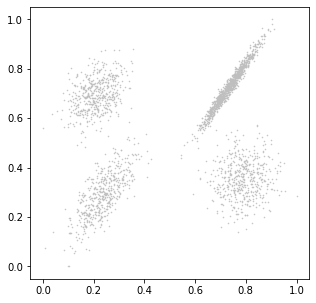

In [57]:
import numpy as np 
import numpy.matlib 
import matplotlib.pyplot as plt

# np.random.rand = uniform random generation, [0, 1]
# np.random.randn = normal random generation, N(0, 1)
r1 = 10*(np.random.rand(2,2) - 0.5)
r2 = 10*(np.random.rand(2,2) - 0.5)
r3 = 10*(np.random.rand(2,2) - 0.5)
r4 = 10*(np.random.rand(2,2) - 0.5)

t1 = 50*(np.random.rand(1,2) - 0.5)
t2 = 50*(np.random.rand(1,2) - 0.5)
t3 = 50*(np.random.rand(1,2) - 0.5)
t4 = 50*(np.random.rand(1,2) - 0.5)

X1 = np.random.randn(1000,2)
X1 = X1.dot(r1) + t1

X2 = np.random.randn(500,2)
X2 = X2.dot(r2) + t2

X3 = np.random.randn(500,2)
X3 = X3.dot(r3) + t3

X4 = np.random.randn(500,2)
X4 = X4.dot(r4) + t4

# unlabel data
X = np.vstack([X1, X2, X3, X4])
np.random.shuffle(X)

# normalization
Xmin = np.min(X, axis = 0)
X = (X - Xmin)

Xmax = np.max(X, axis = 0)
X = X / Xmax

plt.figure(figsize = (5,5))
plt.plot(X[:,0],X[:,1],".",markersize = 1, color = [0.75, 0.75, 0.75])

N,D = X.shape

C:\Users\USER-PC\AppData\Local\Temp/ipykernel_19936/3627748384.py:22: RuntimeWarning: Mean of empty slice
  mu[:,k] = np.nanmean(X[label ==k, :], axis = 0)
C:\Users\USER-PC\AppData\Local\Temp/ipykernel_19936/3627748384.py:30: RuntimeWarning: Mean of empty slice
  inertia[K] = np.nanmean( np.min(dist2, axis = 1) )


'\n너무 외딴 곳에 있어서 샘플이 1개도 선택되지 않는 클러스터가 있을 수도 있다.\n그러므로 NaN = Not a Number를 사용해 비어 있는 거 뺴고 평균을 구해라라는 의미가 된다.\n'

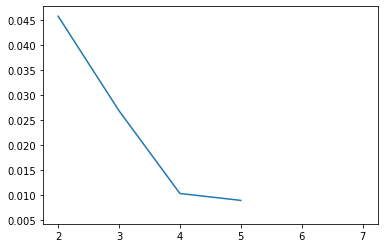

In [64]:
inertia = np.zeros(20)
inertia[:] = np.nan

for K in  range(2, 8):

    bConverge = False
    while not bConverge:
    
        # initialize 
        mu0 = np.random.rand(D,K)
        mu = np.copy(mu0)
        dist2 = np.zeros((N,K))

        # k-means algorithm
        iterMax = 10
        for iter in range(iterMax):
            for k in range(K):
                dist2[:,k] = np.sum( (X - np.matlib.repmat(mu[:,k].reshape(1,-1), N, 1)) ** 2, axis = 1)
            label = np.argmin(dist2, axis = 1)

            for k in range(K):
                mu[:,k] = np.nanmean(X[label ==k, :], axis = 0)
        
        bConverge = True
        for k in range(K):
            if len(label == k) == 0:
                bConverge = False
        # np.min(dist2, axis = 1) = (N, 1)
        # np.mean( np.min(dist2, axis = 1), axis = 0) = (1, 1) 스칼라값
        inertia[K] = np.nanmean( np.min(dist2, axis = 1) )
    
plt.figure()
plt.plot(inertia)

"""
너무 외딴 곳에 있어서 샘플이 1개도 선택되지 않는 클러스터가 있을 수도 있다.
그러므로 NaN = Not a Number를 사용해 비어 있는 거 뺴고 평균을 구해라라는 의미가 된다.
"""


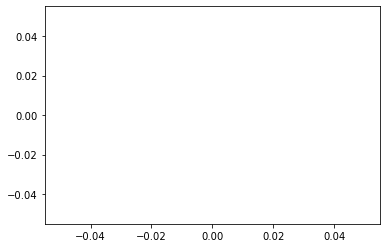

In [74]:
s_score = np.zeros(20)
s_score[:] = np.nan


for K in  range(2, 8):

    while (np.isnan(s_score[K] == True)):
        # initialize 
        mu0 = np.random.rand(D,K)
        mu = np.copy(mu0)
        dist2 = np.zeros((N,K))

        # k-means algorithm
        iterMax = 10
        for iter in range(iterMax):
            for k in range(K):
                dist2[:,k] = np.sum( (X - np.matlib.repmat(mu[:,k].reshape(1,-1), N, 1)) ** 2, axis = 1)
            label = np.argmin(dist2, axis = 1)

            for k in range(K):
                mu[:,k] = np.nanmean(X[label ==k, :], axis = 0)

        s_coeff = np.zeros(N)
        for n in range(N):
            # a = 나랑 같은 클러스터(k1)에 속한, 다른 샘플까지 거리의 평균
            k1 = label[n]
            idk1 = np.where(label == k1)
            if (len(idk1) != 0):
                a = np.sqrt( np.sum( (np.matlib.repmat(X[n, :].reshape(1,-1), len(idk1),1) - X[idk1,:]) ** 2, axis = 1 ) )
                a = np.nanmean(a)
            else:
                a = 0

            # b = 나랑 두번째로 가까운 클러스터(k2)에 속한, 다른 샘플들까지의 거리의 평균
            dist2_n = dist2[n,:]
            dist2_nsort = np.sort(dist2_n)
            k2 = np.where(dist2_n == dist2_nsort[1])
            idk2 = np.where(label == k2[0])
            if (len(idk2) != 0):
                b = np.sqrt( np.sum( (np.matlib.repmat(X[n, :].reshape(1,-1), len(idk2),1) - X[idk2,:]) ** 2, axis = 1 ) )
                b = np.nanmean(b)
            else:
                b = 0

            s_coeff[n] = (b - a) / np.max([a,b])

        s_score[K] = np.nanmean(s_coeff)

plt.figure()
plt.plot(s_score)